# Import Stuff

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, widgets
from IPython.display import clear_output
import os

np.random.seed(1)

# Prepapre dataset & Visualize some data

In [0]:
if not os.path.exists('lfwcrop_grey'):
    !wget conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
    !unzip lfwcrop_grey.zip
    clear_output()

In [0]:
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, h, w, n_row, n_col):
    plt.figure(figsize=(1.5 * n_col, 1.5 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

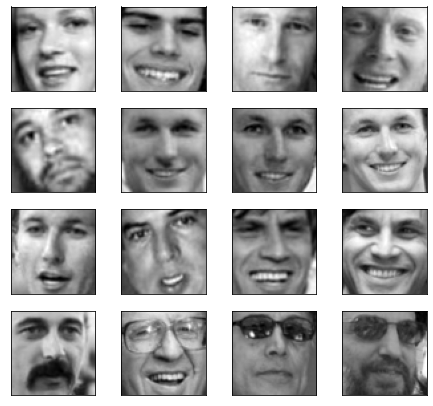

In [5]:
dir='lfwcrop_grey/faces'
celebrity_photos=sorted(os.listdir(dir))[0:500]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
n_samples, h, w = images.shape
plot_portraits(images, h, w, n_row=4, n_col=4)

In [0]:
from numpy.linalg import eig
import timeit
# Implementing PCA:
# Convert your images into column vectors.
d = []

for img in images:
  d.append(img.flatten())

d = np.array(d)

In [7]:
print(np.shape(d))

(500, 4096)


In [8]:
# Calculate Covariance Matrix
start_time = timeit.default_timer()

cov = np.cov(np.transpose(d))
values, vectors = eig(cov)

# Sort eigenvalues and their eigenvectors in descending order
# e_ind_order = np.flip(values.argsort())

e_ind_order = values.argsort()[::-1] #get sorted indices
e_values = values[e_ind_order]
e_vectors = vectors[:,e_ind_order]


w = np.transpose(e_vectors)
transformed_data = d.dot(w[:, :4096])

elapsed = timeit.default_timer() - start_time
print("Time ",elapsed)
print(np.shape(transformed_data))



Time  71.40230179299942
(500, 4096)


(500, 64, 64)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


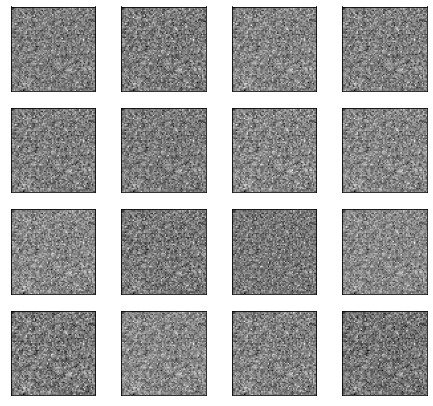

In [9]:
# plot images after pca transformation

transformed_img = np.reshape(transformed_data, (500,64,64))

print(np.shape(transformed_img))

pics = transformed_img.astype('float64')
n_samples, h, w = 500, 64, 64
plot_portraits(pics, h, w, n_row=4, n_col=4)



### Entertainment !


In [0]:
def new_face(w1,w2,w3,w4,w5,w6,w7,w8,w9,w10):
    # output should be initialize with a copy of mean face, but here it is images[2] to avoid RuntimeError, you should change it.
    output = images[2]
    ws = [w1,w2,w3,w4,w5,w6,w7,w8,w9,w10]
    for i,w_ in enumerate(ws):
        #### blank ####
        pass
        
    plt.imshow(output.reshape(h,w), cmap=plt.cm.gray)

interact(new_face,
        w1=widgets.FloatSlider(min=-255, max=255, step=5, value=0, continuous_update=False),
        w2=widgets.FloatSlider(min=-255, max=255, step=5, value=0, continuous_update=False),
        w3=widgets.FloatSlider(min=-255, max=255, step=5, value=0, continuous_update=False),
        w4=widgets.FloatSlider(min=-255, max=255, step=5, value=0, continuous_update=False),
        w5=widgets.FloatSlider(min=-255, max=255, step=5, value=0, continuous_update=False),
        w6=widgets.FloatSlider(min=-255, max=255, step=5, value=0, continuous_update=False),
        w7=widgets.FloatSlider(min=-255, max=255, step=5, value=0, continuous_update=False),
        w8=widgets.FloatSlider(min=-255, max=255, step=5, value=0, continuous_update=False),
        w9=widgets.FloatSlider(min=-255, max=255, step=5, value=0, continuous_update=False),
        w10=widgets.FloatSlider(min=-255, max=255, step=5, value=0, continuous_update=False),
)


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='w1', max=255.0, min=-255.0,…

<function __main__.new_face>